In [3]:
# Leer el archivo CSV
data <- read.csv("deSeqRes_filtrado_Fusobacterium_Nucleatum.csv")
# Filtrar los genes significativos
genes_significativos <- subset(data, padj < 0.05)
# Extraer la lista de genes significativos
lista_genes <- genes_significativos$gene_name
# Verificar si los genes son números (posiblemente IDs de Entrez)
if (all(grepl("^\\d+$", lista_genes))) {
    genes_ids <- lista_genes
} else {
    # Convertir los nombres de genes a IDs de Entrez si son símbolos
    genes_ids <- bitr(lista_genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = org.Hs.eg.db)$ENTREZID
}
genes_ids

[1]      3398      1490     23193    140766      4092      5099      7057
  [8]     84836    389136      4804      5142    399959      9498     57613
 [15]      8848      4929     51421       221      3860      7171      9957
 [22]     22927       760    131583 100287569       631     56993     63967
 [29]     55789     57552     79991     10769     22836    157570    730755
 [36] 105375503     27113    374946 106635533    126731      4277     51384
 [43]      9221    114794     27074    219790     80854      2736      6623
 [50]     25984       840     26472      7077    285362    286467      6272
 [57]    221710      9965      4254 100532742     57402     79801    649446
 [64]      4199      3909      3783      6653     80315    117854      5155
 [71]      3977     28962      3014     50515     51200      1244      4603
 [78]     57405      3673      4493       595     84263     51703     57761
 [85]     84632     26298    170261    113622      8544 100008588     55245
 [92]      8507      5414     55796     22979      4758     91947     23568
 [99]     90317      8751      8506      6674     11098       770    283554
[106]      7023 100128338    135398      2272     10553    221662      5087
[113]      5027     10855      5243 100288866      9183 109864273 107986178
[120]     90427 106631781      1062     11339 100507053 105369634      6817
[127]      7483      8534      6498     11054 105372860 105371441 105370503
[134]    116931      9628     10389     51083 105371692     10788     81575
[141]     57476      2022      9582     80022    144455    222171     84878
[148]     51702    728279      8850 101928034     10882      1591     55879
[155]     11151      5698 102723566 100272228     26047     83786      2861
[162]      9120 105372862     55214 102724009     57088     10580     80139
[169] 100233156      1290      8631     58480 105373424      1303    374393
[176] 100505385     29970      4558        59    414149      4091      7857
[183]      3382    735301     11013     23401      5002      4567    115111
[190]     79413     84223     10333 109910380     26018      1509    127343
[197]      4900      8204     10472    401320      4577     10457    161176
[204] 100507217     92249     54494       933 109864280      7052    196996
[211]    150967      6591     85294 100874530 105373886     79922     58985
[218]        15      8321     55170    643401      8744      3670     57121
[225]     11178 100996579 101928483    204010     83988     84541    407975
[232]     90024 107984500     55061     10736     56971    139818    400499
[239]    145173    147645     84964    144132      2872 105372578    253264
[246] 108570035    119395      8529      2838 105373888      3373    203259
[253]    400224     23179     80312    170689     66008

BIOGRID

In [ ]:
# Ejemplo de consulta a BioGRID
library(RCurl)  # Para realizar solicitudes HTTP
library(XML)    # Para trabajar con XML/HTML
library(httr)
library(biomaRt)
library(org.Hs.eg.db)

In [1]:
# Ejemplo de consulta a BioGRID utilizando una API (adaptar según la API específica)
base_url <- "http://webservice.thebiogrid.org"
method <- "/interactions"

In [6]:
# Definir la URL de la API BioGRID para obtener las interacciones del gen MDM2
# Ejemplo de consulta a BioGRID utilizando una API (adaptar según la API específica)
base_url <- "http://webservice.thebiogrid.org"
method <- "/interactions"
api_key <- "2a4e2455be91b4c686b17f26b16cdeb9"

# Construir la URL de consulta con parámetros adecuados para genes
query_url <- paste(base_url, method, "?geneList=", paste(genes_ids, collapse = "|"), "&searchids=true&includeInteractors=true&accesskey=", api_key, sep = "")

# Realizar la solicitud HTTP
result <- getURL(query_url)


Para analizar las rutas implicadas en las interacciones proteína-proteína, generalmente se ineteresa más las interacciones físicas. Esto se debe a que las interacciones físicas suelen implicar un contacto directo entre las proteínas, formando complejos proteicos que están directamente involucrados en procesos celulares y biológicos específicos. Estas interacciones son fundamentales para comprender cómo las proteínas cooperan entre sí para llevar a cabo funciones biológicas.

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"
Warning message:
"package 'igraph' was built under R version 4.3.3"

Attaching package: 'igraph'


The following object is masked from 'package:IRanges':

    union


The following object is masked from 'package:S4Vectors':

    union


The following objects are masked from 'package:BiocGenerics':

    normalize, path, union


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




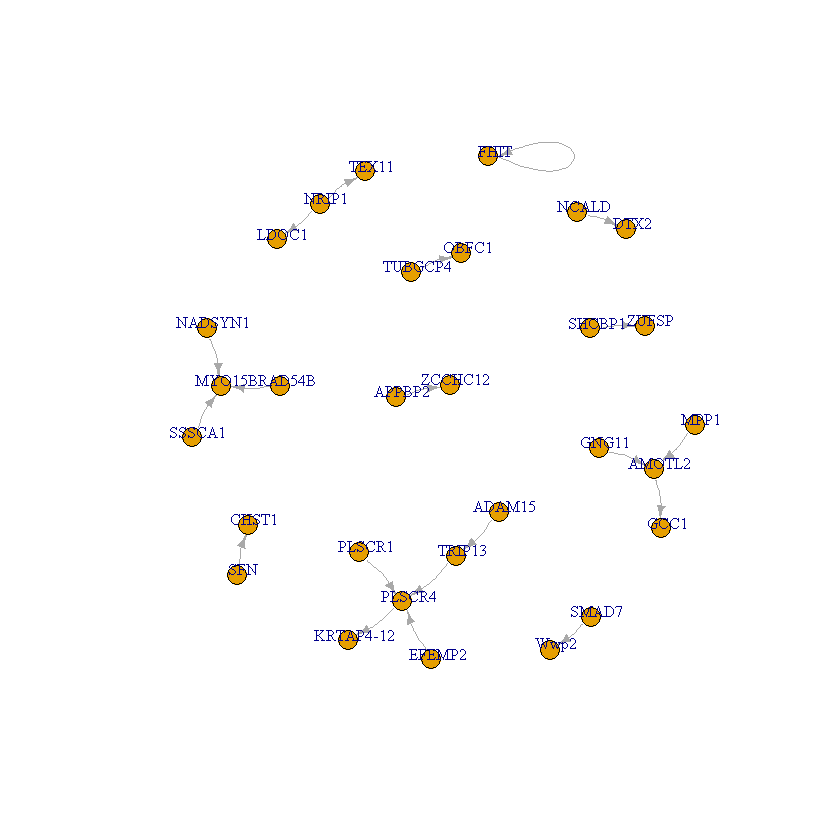

In [7]:
#Intenta leer el archivo TSV con manejo de líneas incompletas
interacciones <- read.table(text = result, sep = "\t", header = FALSE, fill = TRUE)

# Verificar si se leyeron datos válidos
if (length(interacciones) > 0) {
  # Asignar nombres de columnas según la estructura de BioGRID
  col_names <- c("V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10",
                 "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20",
                 "V21", "V22", "V23", "V24")
  
  # Ajustar el vector de nombres si es necesario (puede ser que BioGRID devuelva menos columnas)
  col_names <- head(col_names, ncol(interacciones))
  
  # Asignar nombres de columnas
  colnames(interacciones) <- col_names

  # Verificar si hay filas duplicadas y eliminarlas si es necesario
  interacciones <- unique(interacciones)
  
  # Filtrar por interacciones físicas con alta calidad y seleccionar las primeras 10
  interacciones_fisicas <- interacciones[interacciones$V18 != "Low Throughput" & interacciones$V13 == "physical", c("V8", "V9")]
  interacciones_fisicas <- interacciones_fisicas[1:20, ]
  
  
  
  # Crear un grafo dirigido usando igraph
  library(igraph)
  
  # Crear un grafo vacío con los nodos de interacciones únicas
  grafo <- graph_from_data_frame(d = interacciones_fisicas, directed = TRUE)
  
  # Ajustar el layout para evitar superposiciones
  layout <- layout_with_fr(grafo, weights = E(grafo)$weight)
  
  # Visualizar el grafo con un layout personalizado
  plot(grafo, layout = layout, vertex.label.dist = 0.5, vertex.size = 8, edge.arrow.size = 0.5,
       vertex.label.cex = 0.8, edge.curved = 0.2, margin = 0.1)
  
} else {
  # Manejar el caso de que no se hayan leído datos válidos
  print("No se pudieron leer datos válidos.")
}


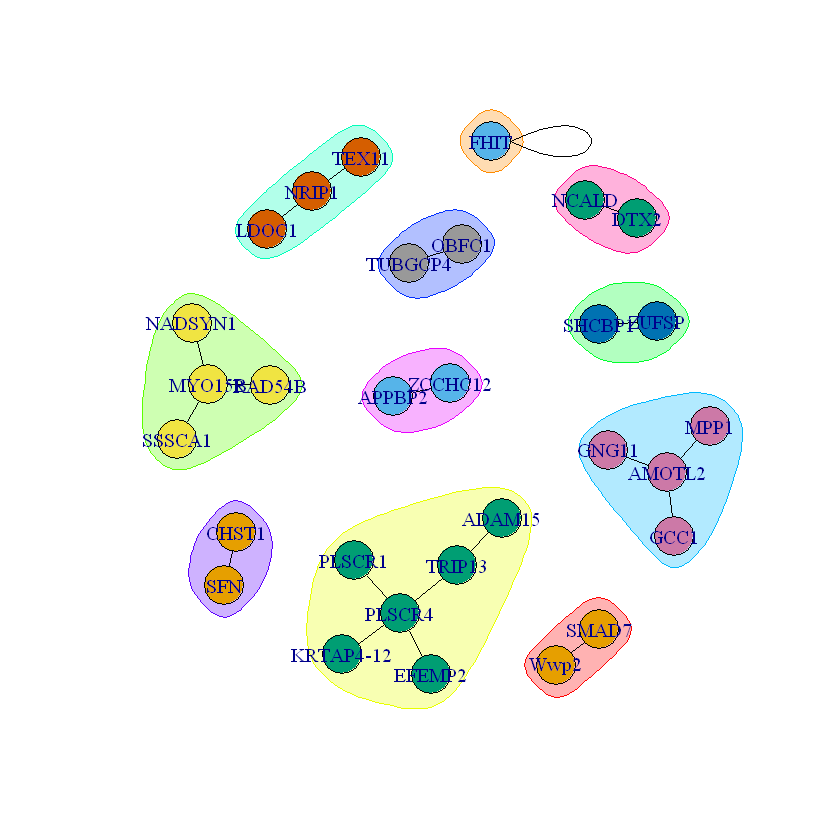

In [8]:
# Convertir el grafo dirigido en no dirigido
grafo_no_dirigido <- as.undirected(grafo, mode = "collapse")
# Detectar comunidades usando el algoritmo de Louvain en el grafo no dirigido
comunidades <- cluster_louvain(grafo_no_dirigido)
plot(comunidades, grafo_no_dirigido, layout = layout)


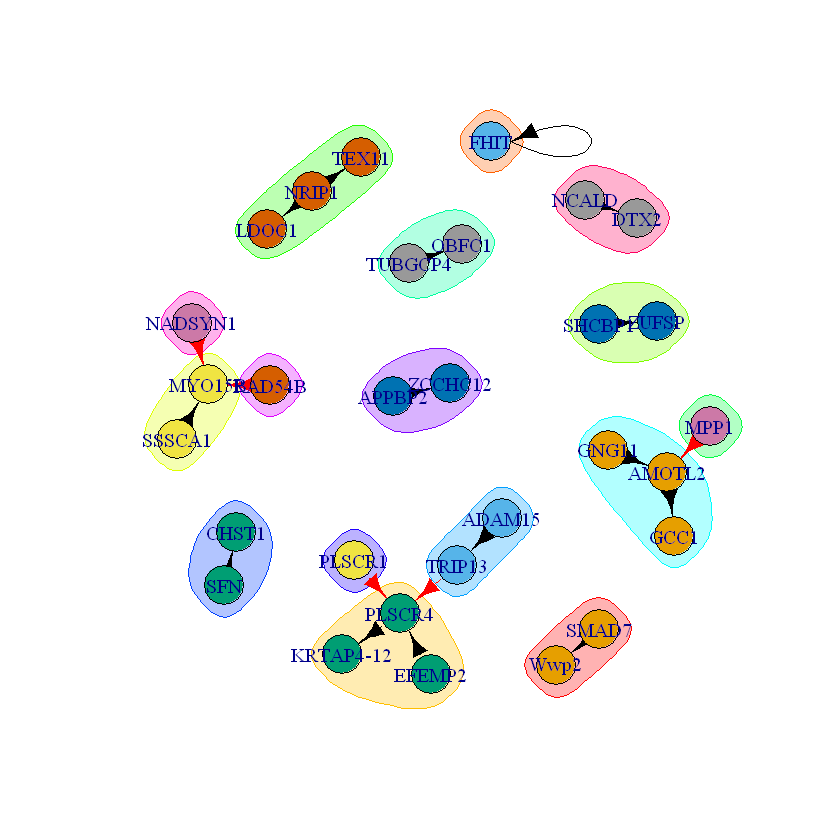

In [9]:
# Detectar comunidades usando el método de propagación de etiquetas en el grafo dirigido
comunidades_label_prop <- cluster_label_prop(grafo, weights = NA)
plot(comunidades_label_prop, grafo, layout = layout)


In [10]:
interacciones_fisicas

,V8,V9
,<chr>,<chr>
23,SMAD7,Wwp2
24,FHIT,FHIT
25,EFEMP2,PLSCR4
26,SSSCA1,MYO15B
27,SHCBP1,ZUFSP
28,NRIP1,LDOC1
29,MPP1,AMOTL2
30,TUBGCP4,OBFC1
31,AMOTL2,GCC1


In [11]:
#Intenta leer el archivo TSV con manejo de líneas incompletas
interacciones <- read.table(text = result, sep = "\t", header = FALSE, fill = TRUE)
str(interacciones)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"


'data.frame':	1925 obs. of  24 variables:
 $ V1 : int  7670 9315 10266 13594 13627 14788 14789 18357 19516 19517 ...
 $ V2 : int  7916 8631 4804 22927 10399 2516 2516 10580 9242 3398 ...
 $ V3 : int  23193 5788 5567 10399 22927 8204 8204 3642 3398 6938 ...
 $ V4 : int  113646 114184 110870 116587 115671 108792 108792 115831 114669 109624 ...
 $ V5 : int  116802 111752 111554 115671 116587 113843 113843 109853 109624 112798 ...
 $ V6 : chr  "DADB-70P7.5" "-" "-" "RP11-172F4.4" ...
 $ V7 : chr  "-" "RP11-553K8.4" "RP11-82H13.1" "HLC7" ...
 $ V8 : chr  "PRRC2A" "SKAP1" "NGFR" "HABP4" ...
 $ V9 : chr  "GANAB" "PTPRC" "PRKACB" "GNB2L1" ...
 $ V10: chr  "BAT2|D6S51|D6S51E|G2" "HEL-S-81p|SCAP1|SKAP55" "CD271|Gp80-LNGFR|TNFRSF16|p75(NTR)|p75NTR" "IHABP-4|IHABP4|Ki-1/57|SERBP1L" ...
 $ V11: chr  "G2AN|GLUII" "B220|CD45|CD45R|GP180|L-CA|LCA|LY5|T200" "PKA C-beta|PKACB" "Gnb2-rs1|H12.3|HLC-7|PIG21|RACK1" ...
 $ V12: chr  "Two-hybrid" "Two-hybrid" "Two-hybrid" "Two-hybrid" ...
 $ V13: chr  "physic

In [12]:
# Nombres de las columnas deseadas
nombres_columnas <- c(
  "BioGRID Interaction ID", 
  "Entrez Gene ID for Interactor A", 
  "Entrez Gene ID for Interactor B", 
  "BioGRID ID for Interactor A", 
  "BioGRID ID for Interactor B", 
  "Systematic name for Interactor A", 
  "Systematic name for Interactor B", 
  "Official symbol for Interactor A", 
  "Official symbol for Interactor B", 
  "Synonyms/Aliases for Interactor A", 
  "Synonyms/Aliases for Interactor B", 
  "Experimental System Name", 
  "Experimental System Type", 
  "First author surname of the publication", 
  "Pubmed ID", 
  "Organism ID for Interactor A", 
  "Organism ID for Interactor B", 
  "Interaction Throughput", 
  "Quantitative Score", 
  "Post Translational Modification", 
  "Phenotypes", 
  "Qualifications", 
  "Tags", 
  "Source Database"
)

# Asignar los nuevos nombres de columnas al DataFrame
colnames(interacciones) <- nombres_columnas

# Verificar la estructura del DataFrame con los nuevos nombres
str(interacciones)

'data.frame':	1925 obs. of  24 variables:
 $ BioGRID Interaction ID                 : int  7670 9315 10266 13594 13627 14788 14789 18357 19516 19517 ...
 $ Entrez Gene ID for Interactor A        : int  7916 8631 4804 22927 10399 2516 2516 10580 9242 3398 ...
 $ Entrez Gene ID for Interactor B        : int  23193 5788 5567 10399 22927 8204 8204 3642 3398 6938 ...
 $ BioGRID ID for Interactor A            : int  113646 114184 110870 116587 115671 108792 108792 115831 114669 109624 ...
 $ BioGRID ID for Interactor B            : int  116802 111752 111554 115671 116587 113843 113843 109853 109624 112798 ...
 $ Systematic name for Interactor A       : chr  "DADB-70P7.5" "-" "-" "RP11-172F4.4" ...
 $ Systematic name for Interactor B       : chr  "-" "RP11-553K8.4" "RP11-82H13.1" "HLC7" ...
 $ Official symbol for Interactor A       : chr  "PRRC2A" "SKAP1" "NGFR" "HABP4" ...
 $ Official symbol for Interactor B       : chr  "GANAB" "PTPRC" "PRKACB" "GNB2L1" ...
 $ Synonyms/Aliases for Interacto

Hay interacciones con otros organismos además de 9606->Homo Sapiens?

In [13]:
# Filtrar los organismos distintos de 9606 en la columna "Organism ID for Interactor A"
organismos_A_distintos <- unique(interacciones$`Organism ID for Interactor A`[interacciones$`Organism ID for Interactor A` != 9606])

# Filtrar los organismos distintos de 9606 en la columna "Organism ID for Interactor B"
organismos_B_distintos <- unique(interacciones$`Organism ID for Interactor B`[interacciones$`Organism ID for Interactor B` != 9606])

# Mostrar los resultados
organismos_A_distintos
organismos_B_distintos

[1] 10116 10090  9913 11676  6239    NA

[1]  10090 559292  37296  11676     NA

Lista de organismos:
https://webservice.thebiogrid.org/organisms/?accesskey=2a4e2455be91b4c686b17f26b16cdeb9

Se encontraron interacciones con estos organismos además de Homo sapiens:

    10116 -> Rattus norvegicus

    10090 -> Mus musculus

    9913 -> Bos taurus

    11676 -> Human Immunodeficiency Virus 1

    6239 -> Caenorhabditis elegans

    559292 -> Saccharomyces cerevisiae (S288c)

    37296 -> Human Herpesvirus 8


In [16]:
# Crear un diccionario que asocie cada Organism ID con su nombre correspondiente
organism_names <- c(
  "9606" = "Homo sapiens",
  "10116" = "Rattus norvegicus",
  "10090" = "Mus musculus",
  "9913" = "Bos taurus",
  "11676" = "Human Immunodeficiency Virus 1",
  "9986" = "Oryctolagus cuniculus",
  "37296" = "Human Herpesvirus 8",
  "559292" = "Saccharomyces cerevisiae (S288c)",
  "333760" = "Human papillomavirus (16)",
  "2697049" = "Severe acute respiratory syndrome coronavirus 2",
  "1335626" = "Middle-East Respiratory Syndrome-related Coronavirus",
  "6239" = "Caenorhabditis elegans",
  "10600" = "Human papillomavirus (6b)",
  "7227" = "Drosophila melanogaster",
  "9823" = "Sus scrofa",
  "9031" = "Gallus gallus"
)

# Reemplazar los valores numéricos con los nombres en la columna "Organism ID for Interactor A"
interacciones$`Organism ID for Interactor A` <- organism_names[as.character(interacciones$`Organism ID for Interactor A`)]

# Reemplazar los valores numéricos con los nombres en la columna "Organism ID for Interactor B"
interacciones$`Organism ID for Interactor B` <- organism_names[as.character(interacciones$`Organism ID for Interactor B`)]

# Verificar el resultado
head(interacciones$`Organism ID for Interactor A`)
head(interacciones$`Organism ID for Interactor B`)


[1] "Homo sapiens" "Homo sapiens" "Homo sapiens" "Homo sapiens" "Homo sapiens"
[6] "Homo sapiens"

[1] "Homo sapiens" "Homo sapiens" "Homo sapiens" "Homo sapiens" "Homo sapiens"
[6] "Homo sapiens"

In [89]:
print(query_url)

[1] "http://webservice.thebiogrid.org/interactions?geneList=3398|1490|23193|140766|4092|5099|7057|84836|389136|4804|5142|399959|9498|57613|8848|4929|51421|221|3860|7171|9957|22927|760|131583|100287569|631|56993|63967|55789|57552|79991|10769|22836|157570|730755|105375503|27113|374946|106635533|126731|4277|51384|9221|114794|27074|219790|80854|2736|6623|25984|840|26472|7077|285362|286467|6272|221710|9965|4254|100532742|57402|79801|649446|4199|3909|3783|6653|80315|117854|5155|3977|28962|3014|50515|51200|1244|4603|57405|3673|4493|595|84263|51703|57761|84632|26298|170261|113622|8544|100008588|55245|8507|5414|55796|22979|4758|91947|23568|90317|8751|8506|6674|11098|770|283554|7023|100128338|135398|2272|10553|221662|5087|5027|10855|5243|100288866|9183|109864273|107986178|90427|106631781|1062|11339|100507053|105369634|6817|7483|8534|6498|11054|105372860|105371441|105370503|116931|9628|10389|51083|105371692|10788|81575|57476|2022|9582|80022|144455|222171|84878|51702|728279|8850|101928034|10882|15

In [17]:
# Guardar la lista de proteínas en un archivo CSV
write.csv(interacciones, file = "interacciones_BioGRID_Fusobacterium_Nucleatum.csv", row.names = FALSE)